Loading the Dataset with ImageDataGenerator

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your dataset
dataset_directory = 'Data/'

# Preprocessing images using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% of data for validation

# Training data generator
train_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(64, 64),  # Resize images to match the model input size
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 10828 images belonging to 11 classes.
Found 2702 images belonging to 11 classes.


1. Class Image Visualization

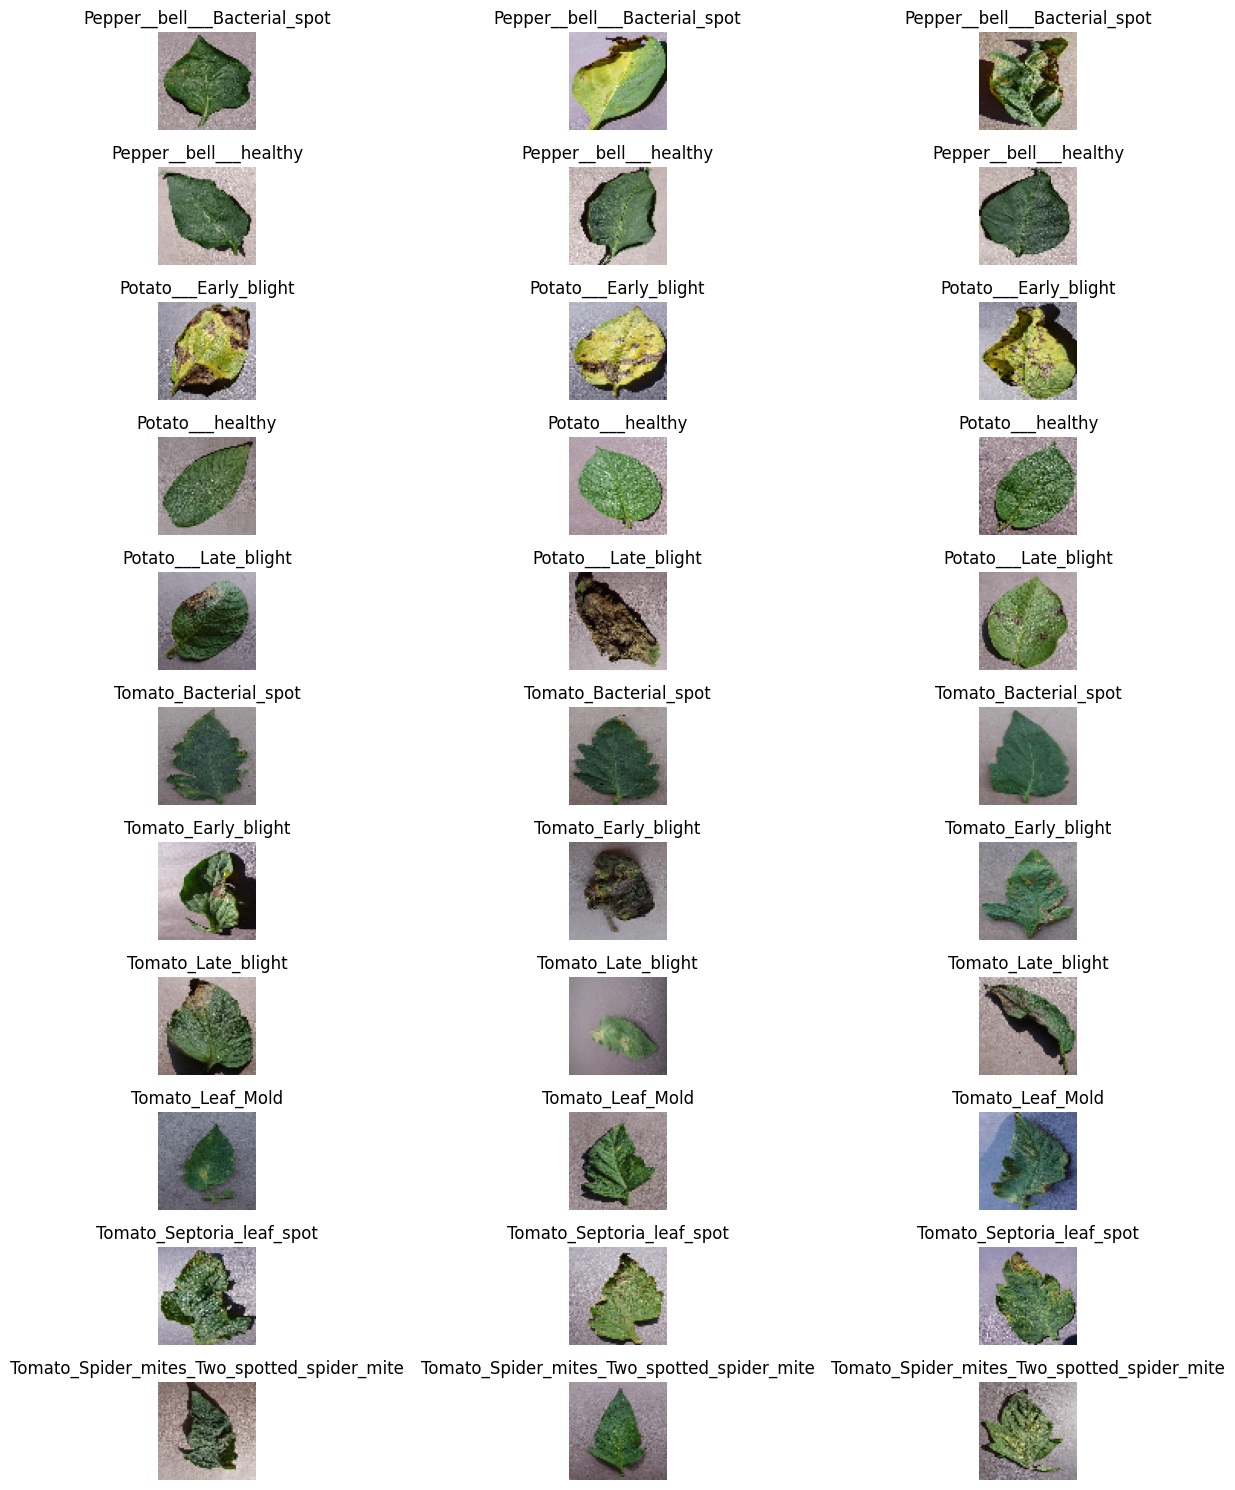

In [13]:
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to visualize random images from each class
def visualize_random_images(data_dir, num_images=3):
    classes = os.listdir(data_dir)  # List all classes
    plt.figure(figsize=(15, 15))
    
    for class_idx, class_name in enumerate(classes):
        class_path = os.path.join(data_dir, class_name)
        images = os.listdir(class_path)
        random_images = random.sample(images, num_images)
        
        for i, img_name in enumerate(random_images):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=(64, 64))
            plt.subplot(len(classes), num_images, class_idx * num_images + i + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize random images from the dataset
visualize_random_images('Data/')


2. Data Augmentation Visualization
We’ll display how the images are augmented (e.g., rotated, zoomed, etc.).

In [ ]:
# Visualize augmented images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(rotation_range=30, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)

# Get one image to apply augmentations
img_path = 'Data/Potato___Early_blight/disease.JPG'  # Replace with the actual path to an image
img = load_img(img_path, target_size=(64, 64))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Plot augmented images
plt.figure(figsize=(10, 10))
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch[0].astype('uint8'))
    plt.axis('off')
    i += 1
    if i == 9:  # Display 9 images
        break

plt.tight_layout()
plt.show()


<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Hp\AppData\Local\Temp\ipykernel_15600\2832008096.py:8: SyntaxWarning: invalid escape sequence '\P'
  img_path = 'Data\Potato___Early_blight\disease.JPG'  # Replace with the actual path to an image


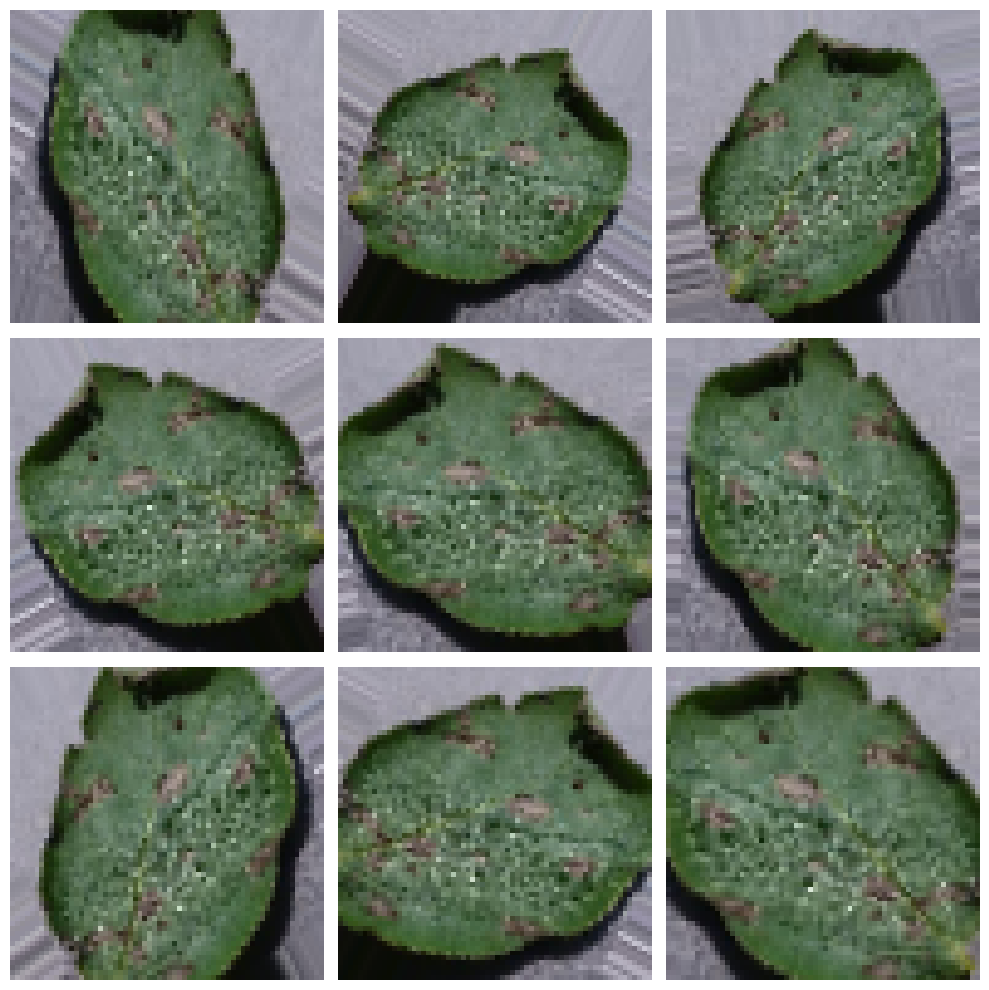

In [14]:
# Visualize augmented images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(rotation_range=30, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)

# Get one image to apply augmentations
img_path = 'Data\Potato___Early_blight\disease.JPG'  # Replace with the actual path to an image
img = load_img(img_path, target_size=(64, 64))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Plot augmented images
plt.figure(figsize=(10, 10))
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch[0].astype('uint8'))
    plt.axis('off')
    i += 1
    if i == 9:  # Display 9 images
        break

plt.tight_layout()
plt.show()


Simple Machine Learning Model (Without Optimization)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Data preparation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    'Data/', 
    target_size=(64, 64), 
    batch_size=32,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    'Data/', 
    target_size=(64, 64), 
    batch_size=32,
    class_mode='categorical'
)

# Define the simple CNN model
simple_model = Sequential()

# Input layer (Convolutional)
simple_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
simple_model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
simple_model.add(Conv2D(64, (3, 3), activation='relu'))
simple_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
simple_model.add(Flatten())

# Fully connected layers
simple_model.add(Dense(128, activation='relu'))
simple_model.add(Dense(train_generator.num_classes, activation='softmax'))  # Adjust output to the number of classes

# Compile the model
simple_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
simple_model.summary()


Found 13530 images belonging to 11 classes.
Found 13530 images belonging to 11 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,571 (6.20 MB)

 Trainable params: 1,626,571 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

3. Training Performance Graphs
We will plot the accuracy and loss over time for both the training and validation sets.

Epoch 1/10
423/423 ━━━━━━━━━━━━━━━━━━━━ 149s 332ms/step - accuracy: 0.4943 - loss: 1.4942 - val_accuracy: 0.7940 - val_loss: 0.5721
Epoch 2/10
423/423 ━━━━━━━━━━━━━━━━━━━━ 77s 181ms/step - accuracy: 0.8267 - loss: 0.5085 - val_accuracy: 0.8823 - val_loss: 0.3535
Epoch 3/10
423/423 ━━━━━━━━━━━━━━━━━━━━ 79s 186ms/step - accuracy: 0.8932 - loss: 0.3127 - val_accuracy: 0.9333 - val_loss: 0.2051
Epoch 4/10
423/423 ━━━━━━━━━━━━━━━━━━━━ 71s 167ms/step - accuracy: 0.9364 - loss: 0.1928 - val_accuracy: 0.9525 - val_loss: 0.1455
Epoch 5/10
423/423 ━━━━━━━━━━━━━━━━━━━━ 75s 177ms/step - accuracy: 0.9607 - loss: 0.1316 - val_accuracy: 0.9664 - val_loss: 0.1019
Epoch 6/10
423/423 ━━━━━━━━━━━━━━━━━━━━ 85s 201ms/step - accuracy: 0.9725 - loss: 0.0872 - val_accuracy: 0.9677 - val_loss: 0.0927
Epoch 7/10
423/423 ━━━━━━━━━━━━━━━━━━━━ 77s 182ms/step - accuracy: 0.9713 - loss: 0.0854 - val_accuracy: 0.9536 - val_loss: 0.1243
Epoch 8/10
423/423 ━━━━━━━━━━━━━━━━━━━━ 75s 176ms/step - accuracy: 0.9814 - loss: 

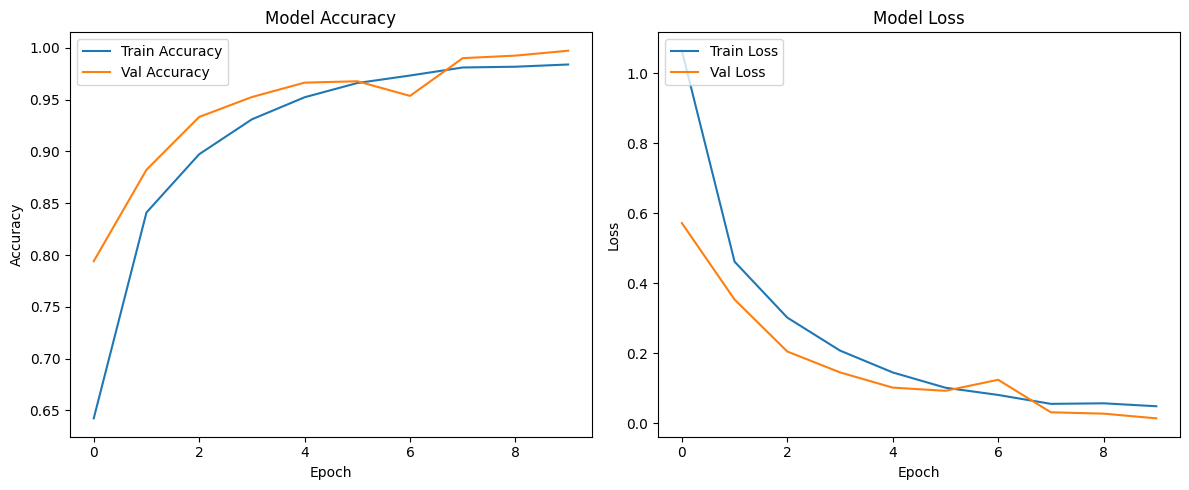

In [21]:
simple_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history_simple = simple_model.fit(train_data, epochs=10, validation_data=val_data)

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot training history for the simple model
plot_training_history(history_simple)

Train the Simple Model

In [23]:
# Train the simple model
history_simple = simple_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# Save the simple model
simple_model.save('saved_models/simple_model.h5')


Epoch 1/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 57s 166ms/step - accuracy: 0.9905 - loss: 0.0339 - val_accuracy: 0.9907 - val_loss: 0.0332
Epoch 2/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0420 - val_accuracy: 1.0000 - val_loss: 8.1169e-04
Epoch 3/10


d:\Study\BSE\MachineLearning\linear_regression_model\.conda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


338/338 ━━━━━━━━━━━━━━━━━━━━ 43s 126ms/step - accuracy: 0.9935 - loss: 0.0214 - val_accuracy: 0.9881 - val_loss: 0.0322
Epoch 4/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 122us/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 0.0077
Epoch 5/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 43s 125ms/step - accuracy: 0.9930 - loss: 0.0240 - val_accuracy: 0.9903 - val_loss: 0.0283
Epoch 6/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 142us/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 7/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 43s 126ms/step - accuracy: 0.9883 - loss: 0.0319 - val_accuracy: 0.9327 - val_loss: 0.2098
Epoch 8/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 134us/step - accuracy: 0.9375 - loss: 0.1650 - val_accuracy: 0.9286 - val_loss: 0.1463
Epoch 9/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 45s 133ms/step - accuracy: 0.9895 - loss: 0.0327 - val_accuracy: 0.9647 - val_loss: 0.0976
Epoch 10/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step - accuracy: 1.0000 - loss: 0.0062 - val_ac

Optimized Machine Learning Model (with Optimization Techniques)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the optimized CNN model
optimized_model = Sequential()

# First convolutional layer with L2 regularization
optimized_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3), kernel_regularizer=l2(0.001)))
optimized_model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with L2 regularization
optimized_model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
optimized_model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Dropout to prevent overfitting
optimized_model.add(Dropout(0.5))

# Flatten layer
optimized_model.add(Flatten())

# Fully connected layers with regularization and dropout
optimized_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
optimized_model.add(Dropout(0.5))
optimized_model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the optimized model
optimized_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Print model summary
optimized_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,571 (6.20 MB)

 Trainable params: 1,626,571 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Train the Optimized Model

In [25]:
# Train the optimized model with early stopping and learning rate scheduling
history_optimized = optimized_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30,  # You can increase this as needed
    callbacks=[early_stopping, reduce_lr]
)

# Save the optimized model
optimized_model.save('saved_models/optimized_model.h5')


Epoch 1/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 59s 161ms/step - accuracy: 0.2759 - loss: 2.2141 - val_accuracy: 0.6213 - val_loss: 1.3055 - learning_rate: 0.0010
Epoch 2/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.5625 - loss: 1.4790 - val_accuracy: 0.5000 - val_loss: 1.3307 - learning_rate: 0.0010
Epoch 3/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 47s 136ms/step - accuracy: 0.5633 - loss: 1.4718 - val_accuracy: 0.7001 - val_loss: 1.1012 - learning_rate: 0.0010
Epoch 4/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step - accuracy: 0.5312 - loss: 1.2951 - val_accuracy: 0.9286 - val_loss: 0.7965 - learning_rate: 0.0010
Epoch 5/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 47s 138ms/step - accuracy: 0.6457 - loss: 1.2689 - val_accuracy: 0.7184 - val_loss: 1.0522 - learning_rate: 0.0010
Epoch 6/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - accuracy: 0.5312 - loss: 1.6221 - val_accuracy: 0.7857 - val_loss: 0.8494 - learning_rate: 0.0010
Epoch 7/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 50s 146ms/step - accuracy: 0.6853

In [26]:
!pip install seaborn


85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step


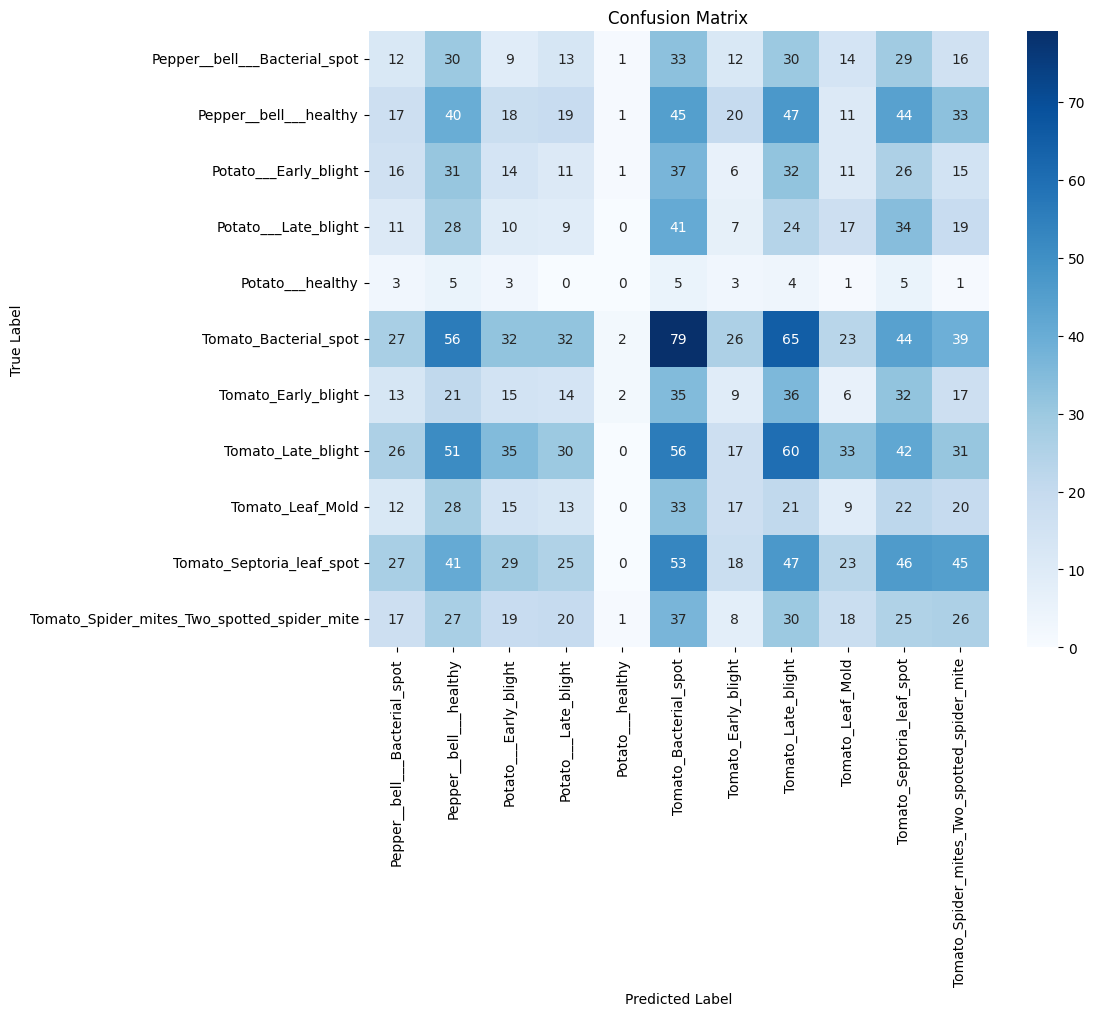

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get true labels and predicted labels
Y_pred = optimized_model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(validation_generator.classes, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
